In [ ]:
# نصب کتابخانه‌های لازم
!pip install matplotlib seaborn

# بارگذاری کتابخانه‌های لازم
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:

# بارگذاری دیتاست Iris
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Silhouette Score: 0.551191604619592


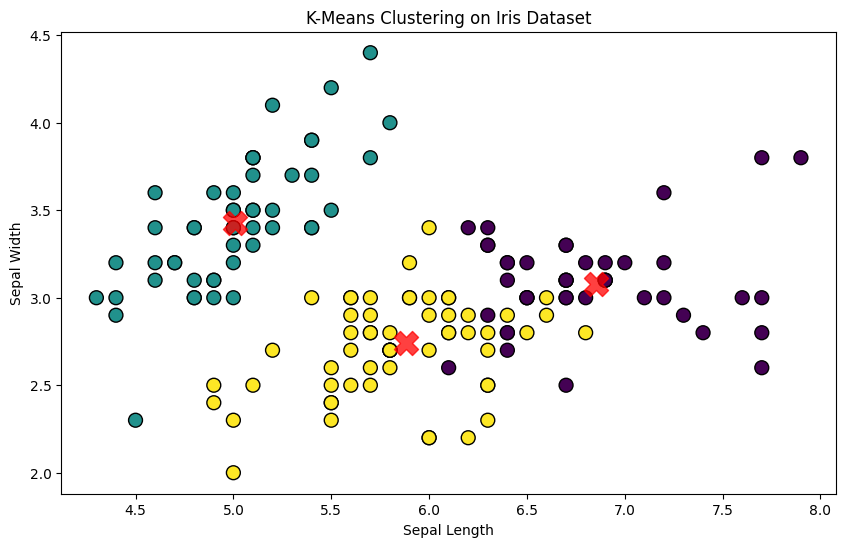

In [11]:



# تعداد خوشه‌ها
n_clusters = 3

# اجرای الگوریتم K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# محاسبه نمره سیلوئت
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

# نمایش نتایج
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, alpha=0.75, marker='X')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Mean Squared Error for each cluster:
Cluster 0: MSE = 0.16290927021696253
Cluster 1: MSE = 0.07575500000000002
Cluster 2: MSE = 0.15692958882020963


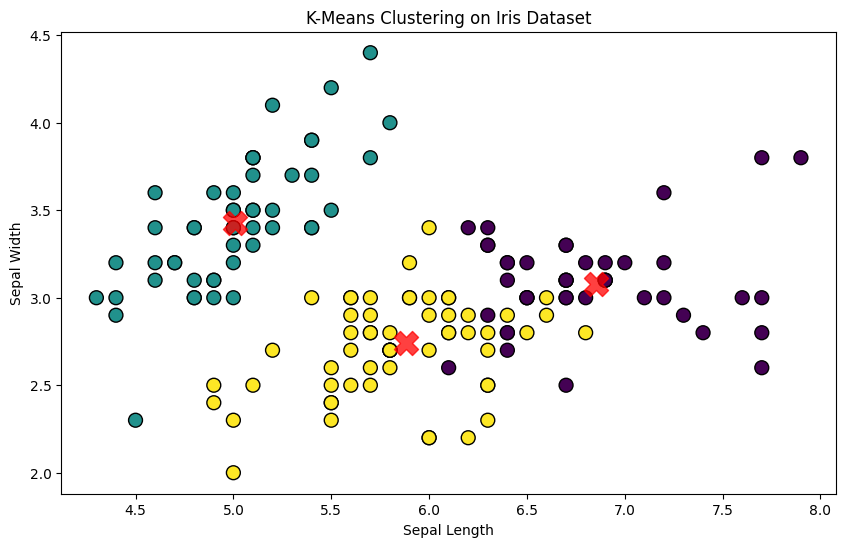

In [12]:
from sklearn.metrics import mean_squared_error

# محاسبه MSE
mse_list = []
for i in range(n_clusters):
    cluster_points = X[y_kmeans == i]
    cluster_center = kmeans.cluster_centers_[i]
    mse = mean_squared_error(cluster_points, [cluster_center] * len(cluster_points))
    mse_list.append(mse)

print("Mean Squared Error for each cluster:")
for i, mse in enumerate(mse_list):
    print(f"Cluster {i}: MSE = {mse}")

# نمایش نتایج
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, alpha=0.75, marker='X')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()